1.	В качестве данных загрузить набор IMDb movie review из keras

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Flatten, LSTM, GRU

import matplotlib.pyplot as plt


In [2]:
max_words = 10000
maxlen = 100

In [3]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_words)
dictionary = imdb.get_word_index()

2.	Далее необходимо все тексты привести к одной размерности. Для этого необходимо использовать функцию pad_sequences, где указывается финальная размерность с помощью параметра maxlen. Параметр padding показывает, куда добавлять 0, если длина исходного текста была меньше maxlen.

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')

Shape of x_train: (25000, 100)
Shape of x_test: (25000, 100)


3.	Создать модель типа Sequential, куда будут добавляться слои. Далее добавить Dense слои, в конце обязательно должен быть Dense слой с одним нейроном (так как задача бинарной классификации и на выходе будет значение 0 или 1, в качестве функции активации лучше использовать сигмоидальную функцию, так как она лучше всего подходит к этой задаче). Количество скрытых слоев и их параметры задайте самостоятельно.
4.	Настройте модель с помощью метода compile. В качестве функции потерь используйте binary_crossentropy, а в качестве метрики accuracy. 

In [5]:
vocab_size = max_words
embedding_dim = 16

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\nikita\Desktop\vscode\oateya\lab7\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

5.	Далее обучите модель на тренировочных данных и постройте графики обучения модели на разных эпохах:

```plt.plot(history.history['accuracy'], label = 'Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()```
Где history – это результат работы метода fit модели (history = model.fit(…))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6298 - loss: 0.6006 - val_accuracy: 0.8234 - val_loss: 0.3860
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9259 - loss: 0.2017 - val_accuracy: 0.8250 - val_loss: 0.4448
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.8122 - val_loss: 0.6587
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9985 - loss: 0.0081 - val_accuracy: 0.8118 - val_loss: 0.9982
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.8180 - val_loss: 1.0736
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.5392e-04 - val_accuracy: 0.8184 - val_loss: 1.1611
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.0660e-05 - val_accuracy: 0.8202 - val_loss: 1.2110
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.1216e-05 - val_

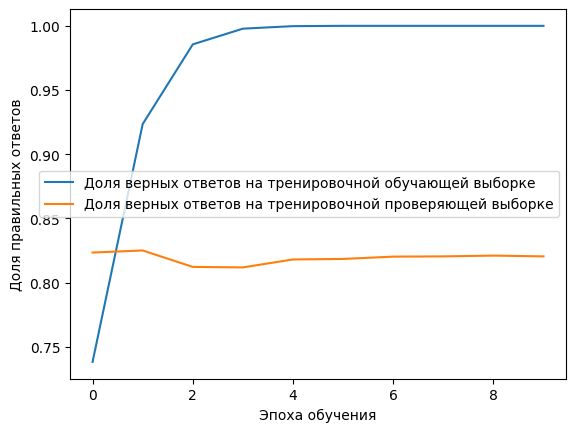

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['accuracy'], label='Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()


6.	Проверьте полученную модель на тестовых данных. Объясните результаты.

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.8148 - loss: 1.3434
Test Loss: 1.3427400588989258
Test Accuracy: 0.8167600035667419


7.	Теперь для тех же данных постройте другую модель. В нее необходимо включить слой Embedding (его параметры: кол-во слов (max_words), длина вектора слова (итоговая), длина входных векторов текстов (maxlen), например, Embedding(max_words,2,input_length=maxlen)), слой SimpleRNN (с кол-вом нейронов в нем) и Dense (последний, такой же, как и в первой части). Точно также настроить модель, обучить ее и построить графики обучения.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5523 - loss: 0.6854 - val_accuracy: 0.6032 - val_loss: 0.6706
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6420 - loss: 0.6393 - val_accuracy: 0.7726 - val_loss: 0.4863
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7398 - loss: 0.5209 - val_accuracy: 0.6326 - val_loss: 0.6229
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7301 - loss: 0.5322 - val_accuracy: 0.7308 - val_loss: 0.6332
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8338 - loss: 0.3960 - val_accuracy: 0.7408 - val_loss: 0.6290
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8957 - loss: 0.2835 - val_accuracy: 0.7866 - val_loss: 0.4953
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9284 - loss: 0.1977 - val_accuracy: 0.7916 - val_loss: 0.5430
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9471 - loss: 0.1562 - val_accuracy: 0.

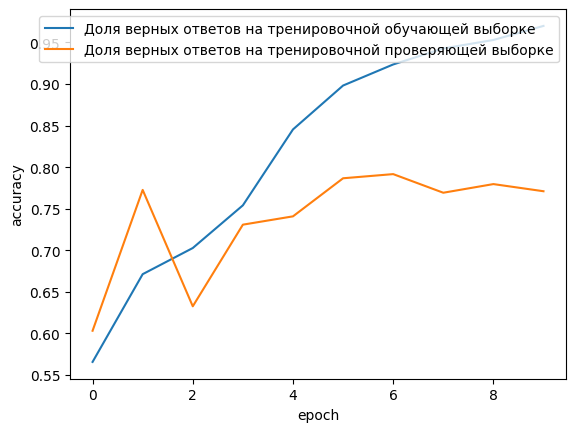

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7876 - loss: 0.6805
Test Loss: 0.679973840713501
Test Accuracy: 0.7860400080680847


In [8]:

model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['accuracy'], label='Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

8.	Постройте разные вариации модели (измените параметры при загрузке данных (max_words, maxlen) и параметры слоев модели. Сравните результаты.

{'max_words': 5000, 'maxlen': 50, 'embedding_dim': 8, 'rnn_units': 16}
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5633 - loss: 0.6628 - val_accuracy: 0.7738 - val_loss: 0.4720
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8210 - loss: 0.4125 - val_accuracy: 0.7928 - val_loss: 0.4366
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8744 - loss: 0.3117 - val_accuracy: 0.7922 - val_loss: 0.4662
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9019 - loss: 0.2615 - val_accuracy: 0.7712 - val_loss: 0.5189
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9242 - loss: 0.2080 - val_accuracy: 0.7750 - val_loss: 0.5314
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9429 - loss: 0.1676 - val_accuracy: 0.7572 - val_loss: 0.6394
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9647 - loss: 0.1155 - val_accuracy: 0.7718 - val_loss: 0.7295
Epoch 8/10
625/625 ━━━━━━━━━━━━━━

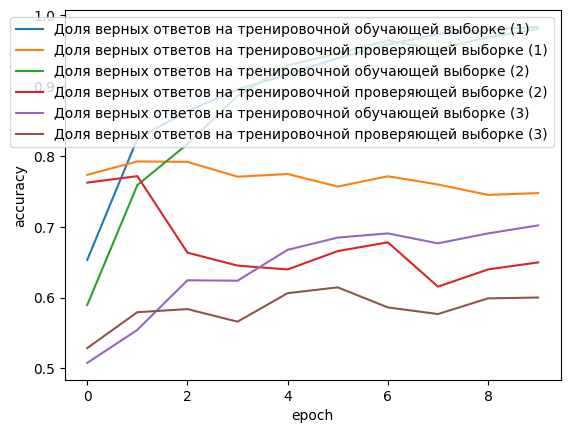

In [9]:
variations = [
    {'max_words': 5000, 'maxlen': 50, 'embedding_dim': 8, 'rnn_units': 16},
    {'max_words': 10000, 'maxlen': 100, 'embedding_dim': 16, 'rnn_units': 32},
    {'max_words': 20000, 'maxlen': 200, 'embedding_dim': 32, 'rnn_units': 64}
    
]

for i, params in enumerate(variations):
    print(params)

    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=params['max_words'])

    x_train = pad_sequences(x_train, maxlen=params['maxlen'], padding='post')
    x_test = pad_sequences(x_test, maxlen=params['maxlen'], padding='post')

    model = Sequential()
    model.add(Embedding(input_dim=params['max_words'], output_dim=params['embedding_dim'], input_length=params['maxlen']))
    model.add(SimpleRNN(params['rnn_units']))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    plt.plot(history.history['accuracy'], label=f'Доля верных ответов на тренировочной обучающей выборке ({i+1})')
    plt.plot(history.history['val_accuracy'], label=f'Доля верных ответов на тренировочной проверяющей выборке ({i+1})')

    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Test Loss ({i+1}): {loss}')
    print(f'Test Accuracy ({i+1}): {accuracy}')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


9.	Постройте модели с использованием LSTM или GRU. Сравните результаты. 

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.5026 - loss: 0.6933 - val_accuracy: 0.5086 - val_loss: 0.6923
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.5083 - loss: 0.6906 - val_accuracy: 0.5124 - val_loss: 0.6888
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.5276 - loss: 0.6771 - val_accuracy: 0.5224 - val_loss: 0.6840
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.5353 - loss: 0.6623 - val_accuracy: 0.5214 - val_loss: 0.6868
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.5387 - loss: 0.6518 - val_accuracy: 0.5222 - val_loss: 0.6995
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5393 - loss: 0.6436 - val_accuracy: 0.5118 - val_loss: 0.7197
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5494 - loss: 0.6388 - val_accuracy: 0.5216 - val_loss: 0.7163
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.5399 - loss: 0.6502 - 

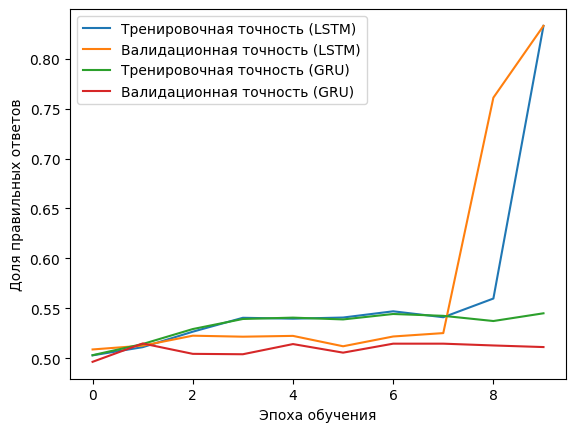

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8305 - loss: 0.4042
Test Loss (LSTM): 0.40166333317756653
Test Accuracy (LSTM): 0.8299999833106995
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5089 - loss: 0.7532
Test Loss (GRU): 0.7560434937477112
Test Accuracy (GRU): 0.5029600262641907


In [14]:
params = {
    'max_words': 10000,
    'embedding_dim': 16,
    'rnn_units': 32,
    'maxlen': 500
}

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=params['max_words'])

x_train = [[min(word, params['max_words'] - 1) for word in review] for review in x_train]
x_test = [[min(word, params['max_words'] - 1) for word in review] for review in x_test]

x_train = pad_sequences(x_train, maxlen=params['maxlen'], padding='post')
x_test = pad_sequences(x_test, maxlen=params['maxlen'], padding='post')

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=params['max_words'], output_dim=params['embedding_dim'], input_length=params['maxlen']))
model_lstm.add(LSTM(params['rnn_units']))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

model_gru = Sequential()
model_gru.add(Embedding(input_dim=params['max_words'], output_dim=params['embedding_dim'], input_length=params['maxlen']))
model_gru.add(GRU(params['rnn_units']))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gru = model_gru.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history_lstm.history['accuracy'], label='Тренировочная точность (LSTM)')
plt.plot(history_lstm.history['val_accuracy'], label='Валидационная точность (LSTM)')
plt.plot(history_gru.history['accuracy'], label='Тренировочная точность (GRU)')
plt.plot(history_gru.history['val_accuracy'], label='Валидационная точность (GRU)')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

loss_lstm, accuracy_lstm = model_lstm.evaluate(x_test, y_test)
print(f'Test Loss (LSTM): {loss_lstm}')
print(f'Test Accuracy (LSTM): {accuracy_lstm}')

loss_gru, accuracy_gru = model_gru.evaluate(x_test, y_test)
print(f'Test Loss (GRU): {loss_gru}')
print(f'Test Accuracy (GRU): {accuracy_gru}')
